In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [9]:
fraud_data = pd.read_csv('/home/ataur/Downloads/Fraud.csv')

In [10]:
fraud_data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
fraud_data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [12]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [13]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [14]:
# Checking the missing values in data
fraud_data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [15]:
fraud_data.duplicated().sum()

0

In [16]:
fraud_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd55644a00>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd5565a100>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd81416130>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd5565a7c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd5565aac0>],
 'means': []}

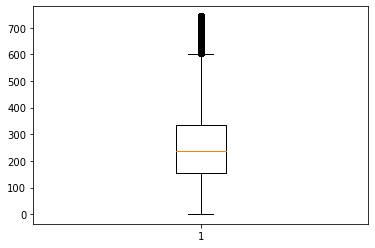

In [17]:
plt.boxplot(fraud_data.step)

In [18]:
IQR = fraud_data['step'].quantile(0.75) - fraud_data['step'].quantile(0.25)

In [19]:
IQR

179.0

In [20]:
lower_limit = fraud_data.step.quantile(0.25) - 1.5*(IQR)

In [21]:
lower_limit

-112.5

In [22]:
upper_limit = fraud_data.step.quantile(0.75) + 1.5*(IQR)

In [23]:
upper_limit

603.5

In [24]:
fraud_data['fruad_outlier_replace'] = np.where(fraud_data['step'] > upper_limit, upper_limit, np.where(fraud_data['step'] < lower_limit, lower_limit, fraud_data['step']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7fdd5482c880>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdd5482cf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdd5482c520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fdd54836640>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fdd54836940>],
 'means': []}

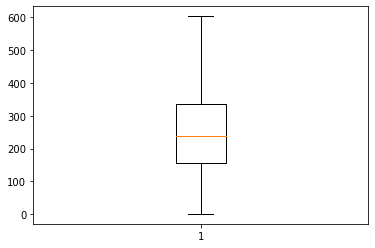

In [25]:
plt.boxplot(fraud_data['fruad_outlier_replace'])

In [26]:
# Distribution of legit transaction & fraudlent transaction
fraud_data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [27]:
# The dataset is highly unblanced
# 0 -> Normal transaction
# 1 -> Fraudulent transaction
# Separating data for analysis

In [28]:
legit = fraud_data[fraud_data.isFraud == 0]
fraud = fraud_data[fraud_data.isFraud == 1]

In [29]:
print(legit.shape)
print(fraud.shape)

(6354407, 12)
(8213, 12)


In [30]:
# Statistical measures of data
legit.amount.describe()

count    6.354407e+06
mean     1.781970e+05
std      5.962370e+05
min      1.000000e-02
25%      1.336840e+04
50%      7.468472e+04
75%      2.083648e+05
max      9.244552e+07
Name: amount, dtype: float64

In [31]:
fraud.amount.describe()

count    8.213000e+03
mean     1.467967e+06
std      2.404253e+06
min      0.000000e+00
25%      1.270913e+05
50%      4.414234e+05
75%      1.517771e+06
max      1.000000e+07
Name: amount, dtype: float64

In [32]:
# Compare the values for both transaction
fraud_data.groupby('isFraud').mean()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,fruad_outlier_replace
isFraud,,,,,,,,
0,243.235663,1.781970e+05,8.328287e+05,855970.228109,1.101421e+06,1.224926e+06,0.000000,242.119542
1,368.413856,1.467967e+06,1.649668e+06,192392.631836,5.442496e+05,1.279708e+06,0.001948,355.005236


In [33]:
# Under sampling -> Building tha sample dataset containing similar distribution of normal and fraudulent transaction
# Number of fraudulent transaction --> 8213

In [34]:
legit_sample = legit.sample(n=8213)

In [35]:
# concatenating two DataFrame
new_fraud = pd.concat([legit_sample, fraud], axis=0)

In [51]:
labelencoder = LabelEncoder()

In [66]:
new_fraud['nameOrig'] = labelencoder.fit_transform(new_fraud['nameOrig'])
new_fraud['nameDest'] = labelencoder.fit_transform(new_fraud['nameDest'])
new_fraud['type'] = labelencoder.fit_transform(new_fraud['type'])

In [67]:
new_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fruad_outlier_replace
3807269,281,1,24153.69,7915,22372.0,0.00,5024,577388.79,601542.48,0,0,281.0
4771367,334,1,242720.76,12477,0.0,0.00,12854,273438.92,516159.68,0,0,334.0
516207,20,1,182060.72,12208,0.0,0.00,4757,588446.29,770507.01,0,0,20.0
6313009,687,4,1523973.10,8846,0.0,0.00,122,9341769.23,10865742.33,0,0,603.5
1930177,168,3,6123.82,2895,697461.0,691337.18,13841,0.00,0.00,0,0,168.0


In [68]:
new_fraud.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,fruad_outlier_replace
6362615,743,1,339682.13,14542,339682.13,0.0,11960,0.00,339682.13,1,0,603.5
6362616,743,4,6311409.28,4599,6311409.28,0.0,6144,0.00,0.00,1,0,603.5
6362617,743,1,6311409.28,1414,6311409.28,0.0,2474,68488.84,6379898.11,1,0,603.5
6362618,743,4,850002.52,5936,850002.52,0.0,7468,0.00,0.00,1,0,603.5
6362619,743,1,850002.52,2428,850002.52,0.0,12627,6510099.11,7360101.63,1,0,603.5


In [69]:
new_fraud['isFraud'].value_counts()

1    8213
0    8213
Name: isFraud, dtype: int64

In [70]:
new_fraud.groupby('isFraud').mean()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,fruad_outlier_replace
isFraud,,,,,,,,,,,
0,241.752831,1.703884,1.747042e+05,8240.055156,8.535153e+05,878294.703015,9456.703154,1.121280e+06,1.240058e+06,0.000000,240.804274
1,368.413856,2.496530,1.467967e+06,8184.944844,1.649668e+06,192392.631836,6768.463168,5.442496e+05,1.279708e+06,0.001948,355.005236


In [71]:
# spliting the data into Features and Target 
x = new_fraud.drop(columns = 'isFraud', axis=1)
y = new_fraud['isFraud']

In [72]:
print(x)

         step  type      amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
3807269   281     1    24153.69      7915       22372.00            0.00   
4771367   334     1   242720.76     12477           0.00            0.00   
516207     20     1   182060.72     12208           0.00            0.00   
6313009   687     4  1523973.10      8846           0.00            0.00   
1930177   168     3     6123.82      2895      697461.00       691337.18   
...       ...   ...         ...       ...            ...             ...   
6362615   743     1   339682.13     14542      339682.13            0.00   
6362616   743     4  6311409.28      4599     6311409.28            0.00   
6362617   743     1  6311409.28      1414     6311409.28            0.00   
6362618   743     4   850002.52      5936      850002.52            0.00   
6362619   743     1   850002.52      2428      850002.52            0.00   

         nameDest  oldbalanceDest  newbalanceDest  isFlaggedFraud  \
3807269      5024 

In [83]:
# split the data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify = y, random_state = 2)

In [84]:
print(x.shape, x_train.shape, x_test.shape)

(16426, 11) (11498, 11) (4928, 11)


In [85]:
# model training 
# Logistiregression

In [90]:
model = LogisticRegression(max_iter=200)

In [91]:
model.fit(x_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Accuracy on Training data

In [94]:
# ModelEvaluation

In [92]:
x_trian_prediction = model.predict(x_train)
training_data_acuracy = accuracy_score(x_trian_prediction, y_train)

In [93]:
print('Accuracy on Training data : ', training_data_acuracy)

Accuracy on Training data :  0.9356409810401809
